In [ ]:
# 데이터 출처 : https://www.datamanim.com/dataset/ADPpb/00/31.html

# 31회 ADP 기출문제

# 기계학습 (60점)

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/mandysia/obesity-dataset-cleaned-and-data-sinthetic 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv
- 데이터 설명 : 각 환자의 의료정보이다. NObeyesdad를 종속변수로 하는 분류모델을 만드려고 한다.


    id: unique id for each row    
    Gender: sex - male or female    
    Age: age    
    Height: height    
    Weight: weight    
    family_history_with_overweight: Has a family member suffered or suffers f from overweight? - yes or no    
    FAVC: Frequent consumption of high caloric food - yes or no     
    FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always    
    NCP: Number of main meals - 1, 2, 3, 4     
    CAEC: Consumption of food between meals - No, Sometimes, Frequently, Always    
    SMOKE: Do you smoke - yes o no    
    CH2O: Consumption of water daily - Less than a litter, between 1 and 2 l, more than 2 l    
    SCC: Calories consumption monitoring - yes or no   
    FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5     
    TUE: Time using technology devices - 0 to 2, 3 to 5, >5    
    CALC: Consumption of alcohol - no, sometimes, frequently, always    
    MTRANS: Transportation used - automobile, motorbike, bike, public_transportation, walking    
    BMI: Body mass index
    
    (종속변수)     
    NObeyesdad: Type of obesity - overweight-level_i, obesity_type_i, obesity_type_ii, obesity_type_iii

* id: 각 행의 고유 ID
* Gender: 성별 - 남성 또는 여성
* Age: 나이
* Height: 키
* Weight: 몸무게
* family_history_with_overweight: 가족 구성원이 과체중을 앓고 있거나 앓았는지 여부 - 예 또는 아니오
* FAVC: 고칼로리 음식의 빈번한 섭취 - 예 또는 아니오
* FCVC: 채소 섭취 빈도 - 전혀 안함, 가끔, 항상
* NCP: 주요 식사 횟수 - 1회, 2회, 3회, 4회
* CAEC: 식사 사이 음식 섭취 - 아니오, 가끔, 자주, 항상
* SMOKE: 흡연 여부 - 예 또는 아니오
* CH2O: 하루 물 섭취량 - 1리터 미만, 1~2리터, 2리터 이상
* SCC: 칼로리 섭취 모니터링 여부 - 예 또는 아니오
* FAF: 신체 활동 빈도 - 0회, 12회, 24회, 4~5회
* TUE: 기술 장치 사용 시간 - 02시간, 35시간, 5시간 이상
* CALC: 알코올 섭취 - 아니오, 가끔, 자주, 항상
* MTRANS: 사용된 교통 수단 - 자동차, 오토바이, 자전거, 대중교통, 걷기
* BMI: 체질량지수

(종속 변수)

* NObeyesdad: 비만 유형 - 과체중 1단계, 비만 1형, 비만 2형, 비만 3형



In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['axes.unicode_minus'] = False

## 1-1  EDA & 결측치 및 이상치를 판단하고 설명하라

In [99]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_1_obesity_v2.csv', encoding = 'cp949')

nul_count = df.isnull().sum()
nul_col = nul_count[nul_count>0]
print('설명변수 {}가 {}개의 결측치를 가지고 있습니다.'.format(nul_col.index.to_list(), nul_col.values))
print('결측치는 해당 변수의 최빈값으로 대체합니다.')

nul_col = nul_col.index.tolist()[0]
df[nul_col] = df[nul_col].fillna(df[nul_col].mode()[0])


설명변수 ['SCC']가 [3]개의 결측치를 가지고 있습니다.
결측치는 해당 변수의 최빈값으로 대체합니다.


단순 행번호를 나타내는 열을 제거합니다.
데이터에서 수치형 값을 갖는 특성은 ['Age', 'Height', 'Weight', 'NCP', 'BMI'] 입니다.

수치형 변수 중 이상치를 갖는 변수들을 찾고, 이상치들에 대해서는 IQR(InterQuantile Range)를 구하여 판정하며, 
1-quartile-0.15*IQR을 하한임계치로 정하여 이 것보다 낮은 경우 하한임계치로 대체,
3-quartile+0.15*IQR을 상한임계치로 정하여 이 것보다 높은 경우 상한임계치로 대체합니다.

설명변수 [Age]가 25240개의 데이터 중 585개의 이상치를 가지고 있습니다. 이상치 상한은 36.000, 하한은 12.000 입니다.
설명변수 [Weight]가 25240개의 데이터 중 5개의 이상치를 가지고 있습니다. 이상치 상한은 167.000, 하한은 31.000 입니다.
설명변수 [NCP]가 25240개의 데이터 중 1635개의 이상치를 가지고 있습니다. 이상치 상한은 3.000, 하한은 3.000 입니다.


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >]], dtype=object)

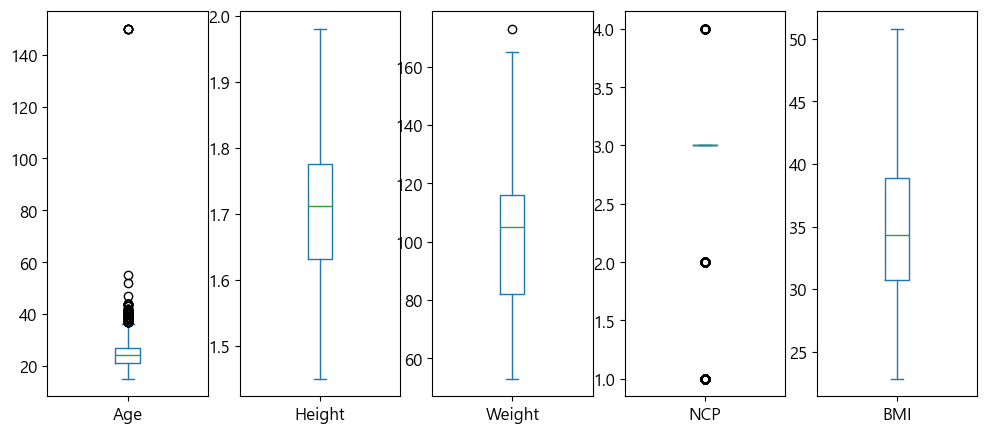

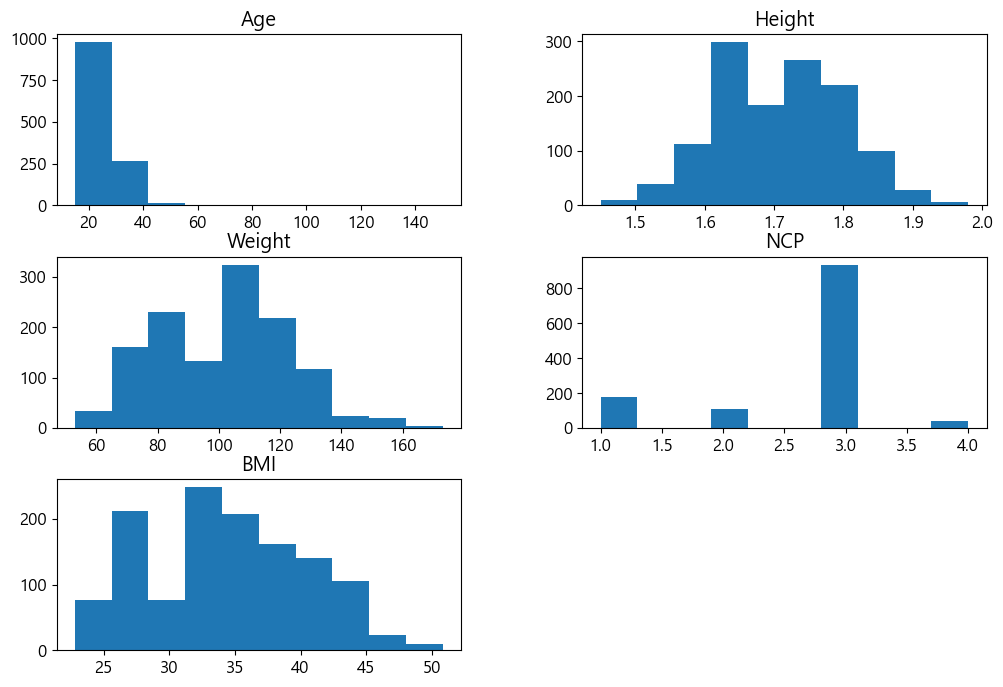

In [ ]:
data = df.drop(['Unnamed: 0'], axis=1)
print('단순 행번호를 나타내는 열을 제거합니다.')

num_df = data.select_dtypes(include=['int64', 'float64'])
print(f'데이터에서 수치형 값을 갖는 특성은 {num_df.columns.tolist()} 입니다.' )
print('''
수치형 변수 중 이상치를 갖는 변수들을 찾고, 이상치들에 대해서는 IQR(InterQuantile Range)를 구하여 판정하며, 
1-quartile-0.15*IQR을 하한임계치로 정하여 이 것보다 낮은 경우 하한임계치로 대체,
3-quartile+0.15*IQR을 상한임계치로 정하여 이 것보다 높은 경우 상한임계치로 대체합니다.
''')

figure, ax = plt.subplots(1, 5)
for a, col in zip(ax, num_df.columns):
    num_df[col].plot(kind='box', ax=a)
    IQR = num_df[col].quantile(0.75)-num_df[col].quantile(0.25) 
    up_bound = num_df[col].quantile(0.75) + IQR*1.5
    lo_bound = num_df[col].quantile(0.25) - IQR*1.5
    up_excd = num_df[ num_df[col] > up_bound ].size
    lo_excd = num_df[ num_df[col] < lo_bound ].size
    num_df[col].clip(lo_bound, up_bound)
    if up_excd+lo_excd > 0:
        print('설명변수 [{}]가 {}개의 데이터 중 {}개의 이상치를 가지고 있습니다. 이상치 상한임계값은 {:.3f}, 하한임계값은 {:.3f} 입니다.'.format(col, df.size, up_excd+lo_excd, up_bound, lo_bound))

num_df.hist(grid=False, figsize=(12, 8))

In [60]:
nom_df = data.drop(num_df.columns, axis=1)
print(f'문자형 변수 목록은 {nom_df.columns} 과 같습니다.')

cat_df = nom_df.drop('id', axis=1)
for col in cat_df.columns:
    print(cat_df[col].value_counts())

print('문자형 변수 중 [id] 특성을 제외한 특성은 모두 범주형 변수입니다. ')

문자형 변수 목록은 Index(['id', 'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object') 과 같습니다.
Gender
male      636
female    626
Name: count, dtype: int64
family_history_with_overweight
yes    1173
no       89
Name: count, dtype: int64
FAVC
yes    1221
no       41
Name: count, dtype: int64
FCVC
always       630
sometimes    580
never         52
Name: count, dtype: int64
CAEC
sometimes     1190
no              37
frequently      22
always          13
Name: count, dtype: int64
SMOKE
no     1237
yes      25
Name: count, dtype: int64
CH2O
between 1 and 2 l    618
more than 2 l        373
less than a liter    271
Name: count, dtype: int64
SCC
no     1219
yes      40
Name: count, dtype: int64
FAF
1 to 2    482
0         471
2 to 4    260
4 to 5     49
Name: count, dtype: int64
TUE
0 to 2    615
3 to 5    521
>5        126
Name: count, dtype: int64
CALC
sometimes     943
no        

In [ ]:
print('결측 및 이상치 처리')
df['SCC'] = df['SCC'].fillna(df['SCC'].mode()[0])

numeric = df.select_dtypes(exclude = 'object').columns

for col in numeric :
  IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
  top = df[col].quantile(0.75) + IQR * 1.5
  down = df[col].quantile(0.25) - IQR * 1.5
  df[col] = df[col].clip(down, top)

결측 및 이상치 처리


In [ ]:
df['SCC'].mode()[0]

'no'

## 1-2 데이터 전처리 기법 2가지를 설명하고 주어진 데이터에 적용시 어떤 효과가 있는지 설명하라

In [ ]:
print('''
데이터 전처리 기법 2가지

1. 원핫 인코딩: 여러값 중 하나만 활성화하는 인코딩이다.
머신러닝 모델은 문자 데이터를 이해하지 못하기 때문에 문자로 구성된 범주형 데이터를 숫자로 바꿀 때 사용한다.
효과 : 현재 데이터는 object 타입의 범주형 데이터가 많으므로, 원 핫 인코딩을 통해 머신러닝 모델에 넣을 수 있는 데이터 형태로 변환할 수 있게된다.


2. 정규화 : 연속형 데이터를 특정 범위 내로 스케일 조정하는 방법이다.
주로 데이터의 범위를 0과 1사이로 제한할 때 사용할 수 있으며, 데이터의 상대적인 크기와 중요성을 유지할 수 있다.
효과 : 현재 데이터는 각 컬럼별 수치 범위가 다양하기 때문에 정규화를 통해 데이터를 0과 1사이로 맞추는 정규화를 진행할 수 있다.
''')


데이터 전처리 기법 2가지

1. 원핫 인코딩: 여러값 중 하나만 활성화하는 인코딩이다.
머신러닝 모델은 문자 데이터를 이해하지 못하기 때문에 문자로 구성된 범주형 데이터를 숫자로 바꿀 때 사용한다.
효과 : 현재 데이터는 object 타입의 범주형 데이터가 많으므로, 원 핫 인코딩을 통해 머신러닝 모델에 넣을 수 있는 데이터 형태로 변환할 수 있게된다.


2. 정규화 : 연속형 데이터를 특정 범위 내로 스케일 조정하는 방법이다.
주로 데이터의 범위를 0과 1사이로 제한할 때 사용할 수 있으며, 데이터의 상대적인 크기와 중요성을 유지할 수 있다.
효과 : 현재 데이터는 각 컬럼별 수치 범위가 다양하기 때문에 정규화를 통해 데이터를 0과 1사이로 맞추는 정규화를 진행할 수 있다.



In [102]:
print('''
    데이터 전처리 기법은 이상치를 처리하는 기법, 클래스 불균형을 처리하는 기법, 머신러닝 모델 성능을 높이기 위해 데이터를 변환하는 기법, 특성이 너무 많은 경우 특성을 제외시키거나 추출하는 특성 엔지니어링 등이 있다.
    이 중 머신러닝 모델 적용 및 성능향상을 위해 적용하는 데이터 변환 기법은 one-hot 인코딩과 스케일링 기법 2가지에 대해 설명한다.
      1. one-hot 인코딩
        문자형의 범주형 변수의 경우 머신러닝에 적용할 수 없기 때문에, 이를 수치화하는 작업이 필요하다. 
        하지만 수치화 시 1, 2, 3 등 서열척도가 바뀌면 서열의 크기가 모델링에 영향을 주게 되므로,
        n개의 범주가 존재할 경우, 각 범주에 해당하는 n-1 개의 더미변수를 추가하고 0 아니면 1의 값을 할당하여 범주를 나타내는 것이 one-hot 인코딩이다.
      2. 스케일링
        수치형 특성이 여러 개인 경우, 각각의 단위가 다르다면 해당 변수 내의 편차의 중요성을 균일하게 맞출 필요가 있다.
        그렇지 않으면 수치가 큰 단위의 특성의 경우 중요도가 더 높게 평가되어, 변수 내에서는 유의미한 편차가 아님에도 타 변수에 비해 큰 값이어서 더 중요한 취급을 받게 된다.
        따라서 표준화 스케일링을 통해 0과 1 사이의 값들로 표준화하는 것이 모델 성능을 높이는 방법이다.
      ''')


    데이터 전처리 기법은 이상치를 처리하는 기법, 클래스 불균형을 처리하는 기법, 머신러닝 모델 성능을 높이기 위해 데이터를 변환하는 기법, 특성이 너무 많은 경우 특성을 제외시키거나 추출하는 특성 엔지니어링 등이 있다.
    이 중 머신러닝 모델 적용 및 성능향상을 위해 적용하는 데이터 변환 기법은 one-hot 인코딩과 스케일링 기법 2가지에 대해 설명한다.
      1. one-hot 인코딩
        문자형의 범주형 변수의 경우 머신러닝에 적용할 수 없기 때문에, 이를 수치화하는 작업이 필요하다. 
        하지만 수치화 시 1, 2, 3 등 서열척도가 바뀌면 서열의 크기가 모델링에 영향을 주게 되므로,
        n개의 범주가 존재할 경우, 각 범주에 해당하는 n-1 개의 더미변수를 추가하고 0 아니면 1의 값을 할당하여 범주를 나타내는 것이 one-hot 인코딩이다.
      2. 스케일링
        수치형 특성이 여러 개인 경우, 각각의 단위가 다르다면 해당 변수 내의 편차의 중요성을 균일하게 맞출 필요가 있다.
        그렇지 않으면 수치가 큰 단위의 특성의 경우 중요도가 더 높게 평가되어, 변수 내에서는 유의미한 편차가 아님에도 타 변수에 비해 큰 값이어서 더 중요한 취급을 받게 된다.
        따라서 표준화 스케일링을 통해 0과 1 사이의 값들로 표준화하는 것이 모델 성능을 높이는 방법이다.
      


In [ ]:
y = df['NObeyesdad']
X = df.drop('NObeyesdad', axis = 1)
X.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI'],
      dtype='object')

In [ ]:
X = X.drop('id',axis = 1)

In [ ]:
cat_df = X.select_dtypes(include = 'object').columns
X = pd.get_dummies(X,columns = cat_df)
X

,Age,Height,Weight,NCP,BMI,Gender_female,Gender_male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,...,TUE_3 to 5,TUE_>5,CALC_frequently,CALC_no,CALC_sometimes,MTRANS_automobile,MTRANS_bike,MTRANS_motorbike,MTRANS_public_transportation,MTRANS_walking
0,27,1.800000,87,3,26.851852,False,True,True,False,True,...,False,False,True,False,False,False,False,False,False,True
1,26,1.850000,105,3,30.679328,False,True,False,True,False,...,False,True,False,False,True,False,False,False,True,False
2,36,1.800000,99,3,30.555556,False,True,True,False,False,...,True,False,True,False,False,True,False,False,False,False
3,29,1.530000,78,3,33.320518,True,False,True,False,False,...,False,False,False,True,False,True,False,False,False,False
4,23,1.650000,70,3,25.711662,True,False,False,True,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,21,1.710730,131,3,44.901475,True,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False
1258,22,1.748584,134,3,43.741923,True,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False
1259,23,1.752206,134,3,43.543817,True,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False
1260,24,1.739450,133,3,44.071535,True,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False


## 1-3 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라

#

In [ ]:
import numpy as np
df['Age_BMI_ratio'] = df['Age']/df['BMI']
df['Age_BMI_ratio'] = df['Age_BMI_ratio'].replace([np.inf, -np.inf], 1)
print('주어진 데이터를 토대로 age와 BMI 두개의 특성을 이용해서 Age_BMI_ratio라는 새로운 특성을 추가하였다')
print('이 새로운 특성은 Age를 BMI로 나눈 값이다. 이를 추가한 이유는 BMI대비 나이가 높을수록 비만정도가 높다는 가설을 확인하기 위함이다.')

주어진 데이터를 토대로 age와 BMI 두개의 특성을 이용해서 Age_BMI_ratio라는 새로운 특성을 추가하였다
이 새로운 특성은 Age를 BMI로 나눈 값이다. 이를 추가한 이유는 BMI대비 나이가 높을수록 비만정도가 높다는 가설을 확인하기 위함이다.


## 2-1 앙상블을 제외한 분류 모델 3가지 구축 및 결과 비교 및 설명하라

In [ ]:
print('''
1.결정트리.
2. SVM
3. KNN을 사용하여 분류해보았다.
''')

y.replace('overweight_level_i', 0,inplace = True)
y.replace('obesity_type_i', 1,inplace = True)
y.replace('obesity_type_ii', 2,inplace = True)
y.replace('obesity_type_iii', 3,inplace = True)
y


1.결정트리.
2. SVM
3. KNN을 사용하여 분류해보았다. 



0       0
1       1
2       1
3       1
4       0
       ..
1257    3
1258    3
1259    3
1260    3
1261    3
Name: NObeyesdad, Length: 1262, dtype: int64

In [ ]:
print('결정트리')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=10)
model_dic = DecisionTreeClassifier()
model_dic.fit(X_train,y_train)
y_pred_decision = model_dic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_decision)
print('결정트리 정확도 : ',accuracy)

print('KNN ')
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print('knn 정확도 : ', accuracy)

from sklearn.svm import SVC
print('SVM ')
model_svm = SVC()
model_svm.fit(X_train,y_train)
y_pred_svm = model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print('svm 정확도 : ', accuracy)




결정트리
결정트리 정확도 :  0.9881422924901185
KNN 
knn 정확도 :  0.9920948616600791
SVM 
svm 정확도 :  0.8893280632411067


In [ ]:
print('knn의 정확도가 0.99가 나와서 가장 높은 정확도를 보였고 그 다음으로 결정트리의 정확도가 0.98로 높았으며, svm이 세 모델 중에서 성능은 가장 낮은 것으로 확인되었다.')
print('따라서 knn모델이 가장 높은 정확도를 가지고 있으므로 가장 좋은 모델이라고 판단할 수 있다.')

knn의 정확도가 0.99가 나와서 가장 높은 정확도를 보였고 그 다음으로 결정트리의 정확도가 0.98로 높았으며, svm이 세 모델 중에서 성능은 가장 낮은 것으로 확인되었다.
따라서 knn모델이 가장 높은 정확도를 가지고 있으므로 가장 좋은 모델이라고 판단할 수 있다.


## 2-2 2-1에서 사용한 모델 중 하나를 골라 그리드 서치를 통해서 파라미터 튜닝 및 분류 모델 성능 평가 (precision ,recall)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [None, 10,20,30],
              'min_samples_split' : [2,4]}
dic_gird_search = GridSearchCV(estimator = model_dic, param_grid= param_grid, cv = 5, scoring = 'accuracy')
dic_gird_search.fit(X_train, y_train)

pred = dic_gird_search.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        52
           3       1.00      1.00      1.00        73

    accuracy                           1.00       253
   macro avg       1.00      1.00      1.00       253
weighted avg       1.00      1.00      1.00       253



## 2-3 2-1의 3가지 모델을 soft voting을 이용하여 모델링 한 결과와 2-2과 비교하라

In [ ]:
from sklearn.ensemble import VotingClassifier

model_svm = SVC(probability= True)
ensemble_model = VotingClassifier(estimators = [('knn', model_knn), ('svm', model_svm), ('dic' , model_dic)], voting = 'soft')


ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('앙상블(보팅) 정확도 :', accuracy)

앙상블(보팅) 정확도 : 0.9960474308300395


In [ ]:
print('2-2의 모델과 소프트 보팅을 사용한 2-3의 결과물을 비교한 결과 2-2의 모델이 더 좋은 성능을 내는 것을 확인할 수 있다.')

2-2의 모델과 소프트 보팅을 사용한 2-3의 결과물을 비교한 결과 2-2의 모델이 더 좋은 성능을 내는 것을 확인할 수 있다.


## 3-2 하나의 모델을 선정하여 Drop-Column Importance 방법으로 특성의 중요도(feature importance)를 산출하여 제시

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state = 10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
baseline = accuracy_score(y_test, y_pred)

drop_importances = []
for col in X_train.columns:
  X_train_drop = X_train.drop(columns = [col])
  X_test_drop = X_test.drop(columns = [col])

  model_drop = DecisionTreeClassifier(random_state = 10)
  model_drop.fit(X_train_drop,y_train)

  y_pred_drop = model_drop.predict(X_test_drop)
  drop_accuracy = accuracy_score(y_test, y_pred_drop)

  drop_importances.append((col, baseline - drop_accuracy))

print(drop_importances)
importance_df = pd.DataFrame(drop_importances, columns = ['Feature','Importance'])

[('Age', 0.011857707509881465), ('Height', 0.0), ('Weight', 0.0), ('NCP', 0.0039525691699604515), ('BMI', 0.007905138339921014), ('Gender_female', 0.0), ('Gender_male', 0.0), ('family_history_with_overweight_no', 0.0), ('family_history_with_overweight_yes', 0.0), ('FAVC_no', -0.0039525691699604515), ('FAVC_yes', -0.0039525691699604515), ('FCVC_always', 0.0), ('FCVC_never', 0.0), ('FCVC_sometimes', 0.0), ('CAEC_always', 0.0), ('CAEC_frequently', 0.0), ('CAEC_no', 0.0039525691699604515), ('CAEC_sometimes', 0.0), ('SMOKE_no', 0.0), ('SMOKE_yes', 0.0), ('CH2O_between 1 and 2 l', -0.0039525691699604515), ('CH2O_less than a liter', -0.0039525691699604515), ('CH2O_more than 2 l', 0.007905138339921014), ('SCC_no', -0.0039525691699604515), ('SCC_yes', -0.0039525691699604515), ('FAF_0', -0.0039525691699604515), ('FAF_1 to 2', 0.0039525691699604515), ('FAF_2 to 4', 0.0039525691699604515), ('FAF_4 to 5', -0.0039525691699604515), ('TUE_0 to 2', 0.0039525691699604515), ('TUE_3 to 5', 0.0039525691699

In [ ]:
importance_df

,Feature,Importance
0,Age,0.011858
1,Height,0.000000
2,Weight,0.000000
3,NCP,0.003953
4,BMI,0.007905
5,Gender_female,0.000000
6,Gender_male,0.000000
7,family_history_with_overweight_no,0.000000
8,family_history_with_overweight_yes,0.000000
9,FAVC_no,-0.003953


## 데이터 설명
- 데이터 출처 : 자체제작
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv
- 데이터 설명 : 중고등학생 건강검진 데이터

## 4-1 아래의 기준으로 전처리를 하여 적정 체중 여부 컬럼을 생성하고 적정 체중여부에 대한 빈도 표를 만들어라

> bmi 계산
    - Bmi = 몸무게(kg)/(키(m)**2)   

> 만나이 구하기
    - 건강검진을 받았던 날을 기준으로 생년월일과 일수 차이가 16년 364일 이하인 경우 만 16세 그 이상의 경우 만 17로 분류하라
    - 윤년 등은 고려하지 않는다. 햇수로 16년 + 일수로 364일이 기준이다


> 적정 체중 여부 (BMI가 아래 구간에 들어올 경우)     
    17세 남자 : 21.03이상 23.21 미만   
    17세 여자 : 20.03이상 22.39 미만    
    16세 남자 : 21.18이상 23.45 미만   
    16세 여자 : 19.61이상 21.74 미만       

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_2_v2.csv')
df.head()

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별
0,ID_4135,169.01,65.47,20041003,2020_11_15,1,2,1,4.4,8.3,남성
1,ID_3289,181.62,69.36,19970725,2014_11_20,0,3,0,4.4,6.9,남성
2,ID_1847,160.89,65.12,20020921,2020_01_28,1,1,1,1.7,9.6,여성
3,ID_4785,162.21,62.28,20020106,2018_09_27,1,4,0,5.1,6.8,남성
4,ID_5693,159.13,54.11,19980708,2015_03_03,0,4,1,0.3,8.5,여성


In [ ]:
df['생년월일포맷변환'] = pd.to_datetime(df['생년월일'], format = "%Y%m%d")
df['측정일자포맷변환'] = pd.to_datetime(df['건강검진일'], format = "%Y_%m_%d")

df['만나이'] = (df['측정일자포맷변환'] - df['생년월일포맷변환']).dt.days // 365
df

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별,생년월일포맷변환,측정일자포맷변환,만나이
0,ID_4135,169.01,65.47,20041003,2020_11_15,1,2,1,4.4,8.3,남성,2004-10-03,2020-11-15,16
1,ID_3289,181.62,69.36,19970725,2014_11_20,0,3,0,4.4,6.9,남성,1997-07-25,2014-11-20,17
2,ID_1847,160.89,65.12,20020921,2020_01_28,1,1,1,1.7,9.6,여성,2002-09-21,2020-01-28,17
3,ID_4785,162.21,62.28,20020106,2018_09_27,1,4,0,5.1,6.8,남성,2002-01-06,2018-09-27,16
4,ID_5693,159.13,54.11,19980708,2015_03_03,0,4,1,0.3,8.5,여성,1998-07-08,2015-03-03,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6796,ID_6443,156.04,55.36,20030429,2020_04_23,1,4,1,7.8,9.3,여성,2003-04-29,2020-04-23,16
6797,ID_3606,182.46,67.55,20050528,2022_08_03,1,4,0,2.9,8.9,남성,2005-05-28,2022-08-03,17
6798,ID_5704,150.18,48.29,20030420,2020_02_29,0,1,1,6.0,7.8,여성,2003-04-20,2020-02-29,16
6799,ID_6637,159.45,60.53,20000718,2016_12_11,0,1,1,7.6,5.4,여성,2000-07-18,2016-12-11,16


In [ ]:
df.만나이.unique()

array([16, 17])

In [ ]:
# bmi 계산 - Bmi = 몸무게(kg)/(키(m)**2)
df['BMI'] = df['weight']/((df['키']/100)**2)
df.head()

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별,생년월일포맷변환,측정일자포맷변환,만나이,BMI
0,ID_4135,169.01,65.47,20041003,2020_11_15,1,2,1,4.4,8.3,남성,2004-10-03,2020-11-15,16,22.920154
1,ID_3289,181.62,69.36,19970725,2014_11_20,0,3,0,4.4,6.9,남성,1997-07-25,2014-11-20,17,21.027214
2,ID_1847,160.89,65.12,20020921,2020_01_28,1,1,1,1.7,9.6,여성,2002-09-21,2020-01-28,17,25.156852
3,ID_4785,162.21,62.28,20020106,2018_09_27,1,4,0,5.1,6.8,남성,2002-01-06,2018-09-27,16,23.669733
4,ID_5693,159.13,54.11,19980708,2015_03_03,0,4,1,0.3,8.5,여성,1998-07-08,2015-03-03,16,21.368469


In [ ]:
'''
적정 체중 여부 (BMI가 아래 구간에 들어올 경우)
16세 남자 : 21.18이상 23.45 미만
16세 여자 : 19.61이상 21.74 미만
17세 남자 : 21.03이상 23.21 미만
17세 여자 : 20.03이상 22.39 미만
'''

df.loc[(df['성별'] == '남성') & (df['만나이'] == 16)& (df['BMI']>=21.18) & (df['BMI']<23.45),'적정체중여부'] = '적절'
df.loc[(df['성별'] == '여성') & (df['만나이'] == 16)& (df['BMI']>=19.61) & (df['BMI']<21.74),'적정체중여부'] = '적절'
df.loc[(df['성별'] == '남성') & (df['만나이'] == 17)& (df['BMI']>=21.03) & (df['BMI']<23.21),'적정체중여부'] = '적절'
df.loc[(df['성별'] == '여성') & (df['만나이'] == 17)& (df['BMI']>=20.03) & (df['BMI']<22.39),'적정체중여부'] = '적절'

df.loc[df['적정체중여부'] !='적절', '적정체중여부'] = '부적절'

In [ ]:
df.head()

,ID,키,weight,생년월일,건강검진일,공학여부,채소섭취정도,아침식사여부,일주일운동시간,수면시간,성별,생년월일포맷변환,측정일자포맷변환,만나이,BMI,적정체중여부
0,ID_4135,169.01,65.47,20041003,2020_11_15,1,2,1,4.4,8.3,남성,2004-10-03,2020-11-15,16,22.920154,적절
1,ID_3289,181.62,69.36,19970725,2014_11_20,0,3,0,4.4,6.9,남성,1997-07-25,2014-11-20,17,21.027214,부적절
2,ID_1847,160.89,65.12,20020921,2020_01_28,1,1,1,1.7,9.6,여성,2002-09-21,2020-01-28,17,25.156852,부적절
3,ID_4785,162.21,62.28,20020106,2018_09_27,1,4,0,5.1,6.8,남성,2002-01-06,2018-09-27,16,23.669733,부적절
4,ID_5693,159.13,54.11,19980708,2015_03_03,0,4,1,0.3,8.5,여성,1998-07-08,2015-03-03,16,21.368469,적절


In [ ]:
df['적정체중여부'].value_counts()

적정체중여부
적절     3993
부적절    2808
Name: count, dtype: int64

## 4-2 4-1에서 구한 적정 체중 여부와 나머지 컬럼(공학여부, 아침식사여부, 일주일운동시간, 채소섭취정도, 수면시간, 성별) 이 독립적인지 통계적으로 확인하라

In [ ]:
from scipy.stats import chi2_contingency

columns_to_test = ['공학여부','아침식사여부','일주일운동시간','채소섭취정도','수면시간','성별']

result = []
for column in columns_to_test:
  contingency_table = pd.crosstab(df['적정체중여부'], df[column])
  chi2, p, _, _ = chi2_contingency(contingency_table)
  result.append([chi2,p])

result_df = pd.DataFrame(result, columns = ['chi','p_value'], index = columns_to_test)
result_df

,chi,p_value
공학여부,4.542368,0.033066
아침식사여부,0.152151,0.696488
일주일운동시간,115.745222,0.119871
채소섭취정도,10.143194,0.038083
수면시간,46.992431,0.554877
성별,0.002345,0.961379


In [ ]:
print('''
검정 결과 p-value값이 0.05이상이면 해당 변수는 적정체중여부와 독립적이고
0.05이하이면 독립적이지 않다고 판단할 수 있다.

따라서 결과를 확인해보면 공학여부, 채소섭취정도는 독립적이지 않은 변수이며
나머지 컬럼, 즉 아침식사여부, 일주일운동시간, 수면시간, 성별은 적정 체중여부와 독립적인 것을 확인할 수 있었다.
    '''
)


검정 결과 p-value값이 0.05이상이면 해당 변수는 적정체중여부와 독립적이고
0.05이하이면 독립적이지 않다고 판단할 수 있다.

따라서 결과를 확인해보면 공학여부, 채소섭취정도는 독립적이지 않은 변수이며
나머지 컬럼, 즉 아침식사여부, 일주일운동시간, 수면시간, 성별은 적정 체중여부와 독립적인 것을 확인할 수 있었다.
    


## 4-3 4-2에서 유의한 변수들만 가지고 적정 체중 여부를 예측하는 모델을 구현하고 성능 평가 및 해석을 하라 (로지스틱회귀 ,xgb)
> 로지스틱회귀 모델은 오즈비를 구하라
> xgb의 경우 각 피쳐중요도를 확인하고 예측에 영향을 가장 미치는 변수를 확인하라

In [ ]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import numpy as np

df.loc[df['적정체중여부'] == '적절', '적정체중여부'] = 1
df.loc[df['적정체중여부'] == '부적절', '적정체중여부'] = 0
X = pd.get_dummies(df[['공학여부','채소섭취정도']])
y = df['적정체중여부']
y = y.astype(int)

logistic_model = LogisticRegression()
logistic_model.fit(X,y)

xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X,y)

logistic_coefs = logistic_model.coef_[0]
xgboost_importance = xgboost_model.feature_importances_

print('로지스틱 모델 오즈비 : ', np.exp(logistic_coefs))
print('xgboost 모델 피처 중요도 : ',xgboost_importance )

로지스틱 모델 오즈비 :  [1.11204771 1.00557371]
xgboost 모델 피처 중요도 :  [0.7267853  0.27321473]


In [ ]:
print('''
로지스틱 모델의 오즈비는 공학여부의 경우 1.11204771 , 채소섭취정도는 1.00557371로 측정되었고
XGBoost 모델의 피처중요도는 공학여부의 경우 0.7267853, 채소섭취정도는 0.27321473가 나왔다.
xgboost의 경우 예측에 가장 많이 영향을 미치는 컬럼은 공학여부로 확인할 수 있었다.
'''
)


로지스틱 모델의 오즈비는 공학여부의 경우 1.11204771 , 채소섭취정도는 1.00557371로 측정되었고
XGBoost 모델의 피처중요도는 공학여부의 경우 0.7267853, 채소섭취정도는 0.27321473가 나왔다.
xgboost의 경우 예측에 가장 많이 영향을 미치는 컬럼은 공학여부로 확인할 수 있었다.



## 4-4 4-3 두 모델의 roc-auc 그래프를 하나의 그래프에 겹쳐 그려라

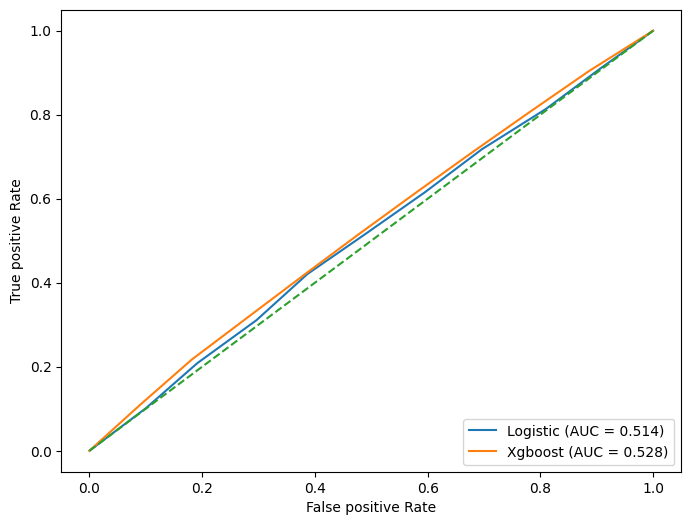

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_logistic_prob = logistic_model.predict_proba(X)[:,1]
fpr_logistic, tpr_logistic, _ = roc_curve(y,y_logistic_prob)
roc_auc_logistic = roc_auc_score(y,y_logistic_prob)

y_xgboost_prob = xgboost_model.predict_proba(X)[:,1]
fpr_xgboost, tpr_xgboost, _ = roc_curve(y,y_xgboost_prob)
roc_auc_xgboost = roc_auc_score(y,y_xgboost_prob)


plt.figure(figsize = (8,6))
plt.plot(fpr_logistic, tpr_logistic , label = f'Logistic (AUC = {roc_auc_logistic:.3f})')
plt.plot(fpr_xgboost, tpr_xgboost , label = f'Xgboost (AUC = {roc_auc_xgboost:.3f})')
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# 통계 (40점)

## 5. 평균이 $\theta$이고 분산이 100인 정규분포의 사전분포가 (100, 256)일때 120의 값을 가지는 데이터가 있을 경우 사후평균은? (5점)
무게가 N($\theta$, 100)인 정규분포에서, 사전분포는 N(100, 256)이다. 제품의 무게가 120kg일 때, 사후분포의 평균을 구하라 (단, 소수점 3째자리까지 구하라)

In [ ]:
mu_prior = 100
sigma_prior_squared = 256

sigma_data_squared = 100
x_observed = 120

mu_posterior = (sigma_data_squared * mu_prior + sigma_prior_squared * x_observed) / (sigma_data_squared + sigma_prior_squared)
round(mu_posterior,3)

114.382

## 데이터 설명
- 데이터 출처 : https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv
- 데이터 설명 : TV, Radio, Newspaper에 각각 광고비(달러)를 다르게 했을때 매출액 (Sales , 밀리언달러)를 나타내는 데이터
- 종속변수 : Sales

## 6-1 회귀 모델링 후 유의하지 않는변수 파악 (15점)

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_5_advertising.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
y = df['Sales']
X = df[['TV','Radio','Newspaper']]

import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

print(model.summary())
print('Newpaper 변수가 유의하지 않음')

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 26 May 2024   Prob (F-statistic):           8.13e-99
Time:                        13:37:07   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

## 6-2 변수 선택시 먼저 제거 될 변수 및 근거 제시

In [ ]:
print('''
pvalue 값이 0.05이하일 때 유의미한 변수로 진단할 수 있다
현재 Newspaper를 제외한 나머지 변수들은 유의미한 것을 알 수 있고, 같은 이유로 Newspaper가 변수 선택시 먼저 제거해야함을 알 수 있습니다
''')


pvalue 값이 0.05이하일 때 유의미한 변수로 진단할 수 있다
현재 Newspaper를 제외한 나머지 변수들은 유의미한 것을 알 수 있고, 같은 이유로 Newspaper가 변수 선택시 먼저 제거해야함을 알 수 있습니다



## 6-3 VIF를 통한 다중공선성 진단

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['변수']  = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)
print('일반적으로 VIF값이 10이 넘어가면 다중공선성 문제가 있다고 판단한다. 그런데 결과를 보면 모든 변수가 다중 공선성이 없는 것을 확인할 수 있다. ')

          변수       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187
일반적으로 VIF값이 10이 넘어가면 다중공선성 문제가 있다고 판단한다. 그런데 결과를 보면 모든 변수가 다중 공선성이 없는 것을 확인할 수 있다. 


## 7 (15점)  
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv
- 데이터 설명 : A,B,C,D,E 영업사원의 각 계약 성사 유무 (1:계약 , 0:미계약) 를 나타낸 데이터이다. 영업사원의 평균 계약 성사 건수는 같은지 통계 검정하라

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv')
df.head()

,Unnamed: 0,A,B,C,D,E
0,contract_1,1,0,1,1,1
1,contract_2,0,1,0,1,0
2,contract_3,1,0,0,0,0
3,contract_4,0,1,1,1,1
4,contract_5,0,1,0,1,0


In [ ]:
from statsmodels.stats.contingency_tables import cochrans_q
Q = cochrans_q(df[['A','B','C','D','E']])
print('p-value : ',Q.pvalue)
print('각 사원의 계약 성사 건수가 같다.')

p-value :  0.3406392758219471
각 사원의 계약 성사 건수가 같다.


In [ ]:
from scipy.stats import chi2_contingency

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/31/adp_31_7.csv')

contingency_table = pd.crosstab(index = df.index, columns = [df['A'],df['B'],df['C'],df['D'],df['E']])

chi2, p, _, _ = chi2_contingency(contingency_table)
print('p-value : ', p)
print('귀무가설(H0) : 각 영업 사원의 평균 계약 성사 건수가 같다.')
print('대립가설(H1) : 각 영업 사원의 평균 계약 성사 건수가 유의미하게 다르다.')

print('pvale 값이 0.05보다 크기때문에 각 사원의 계약 성사 건수가 같다라고 판단할 수 있다')



p-value :  0.24214339972793059
귀무가설(H0) : 각 영업 사원의 평균 계약 성사 건수가 같다.
대립가설(H1) : 각 영업 사원의 평균 계약 성사 건수가 유의미하게 다르다.
pvale 값이 0.05보다 크기때문에 각 사원의 계약 성사 건수가 같다라고 판단할 수 있다


## 8 유기견이 하루에 2.2마리 발생하며 포아송 분포를 따른다고 알려져 있다고 할 때 아래 문제의 확률은? (10점)

## 8-1 한 마리도 안 버려질 확률

In [ ]:
from scipy.stats import poisson

lambda_ = 2.2

proba = poisson.pmf(0,lambda_)
print('한마리도 안 버려질 확률 : ', proba)


한마리도 안 버려질 확률 :  0.11080315836233387


## 8-2 적어도 2마리 버려질 확률

In [ ]:
from scipy.stats import poisson
lambda_ = 2.2
proba = poisson.cdf(1,lambda_)
result = 1 - proba
print('적어도 2마리 버려져있을 확률 :', result)

적어도 2마리 버려져있을 확률 : 0.6454298932405317
